<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Variables significativas para el clustering de productos
    
    
<strong>Conclusions:</strong>

   
</div>

In [2]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [3]:
import pandas as pd
import numpy as np
from src.load_data import load_clustering_data, load_data
from src.trainer_clustering import get_pca_components, plot_cluster, train_DBSCAN, search_best
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
main_df = load_data()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1082
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
[WARNING] Stock data with different units for same product & data. Rows: 13017
Dataset stock loaded. Shape: (26220, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). 

/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['missing'] = (ts.udsstock.isna()) * 1
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data["roll4wd_" + col] = day_data.loc[(day_data.festivo == 0), col].rolling(4, win_type='triang', min_periods=1).mean()
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_va

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and 

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and 

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and 

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

In [ ]:
prods = ["30","32","42","48","40","63","66","72","84"]

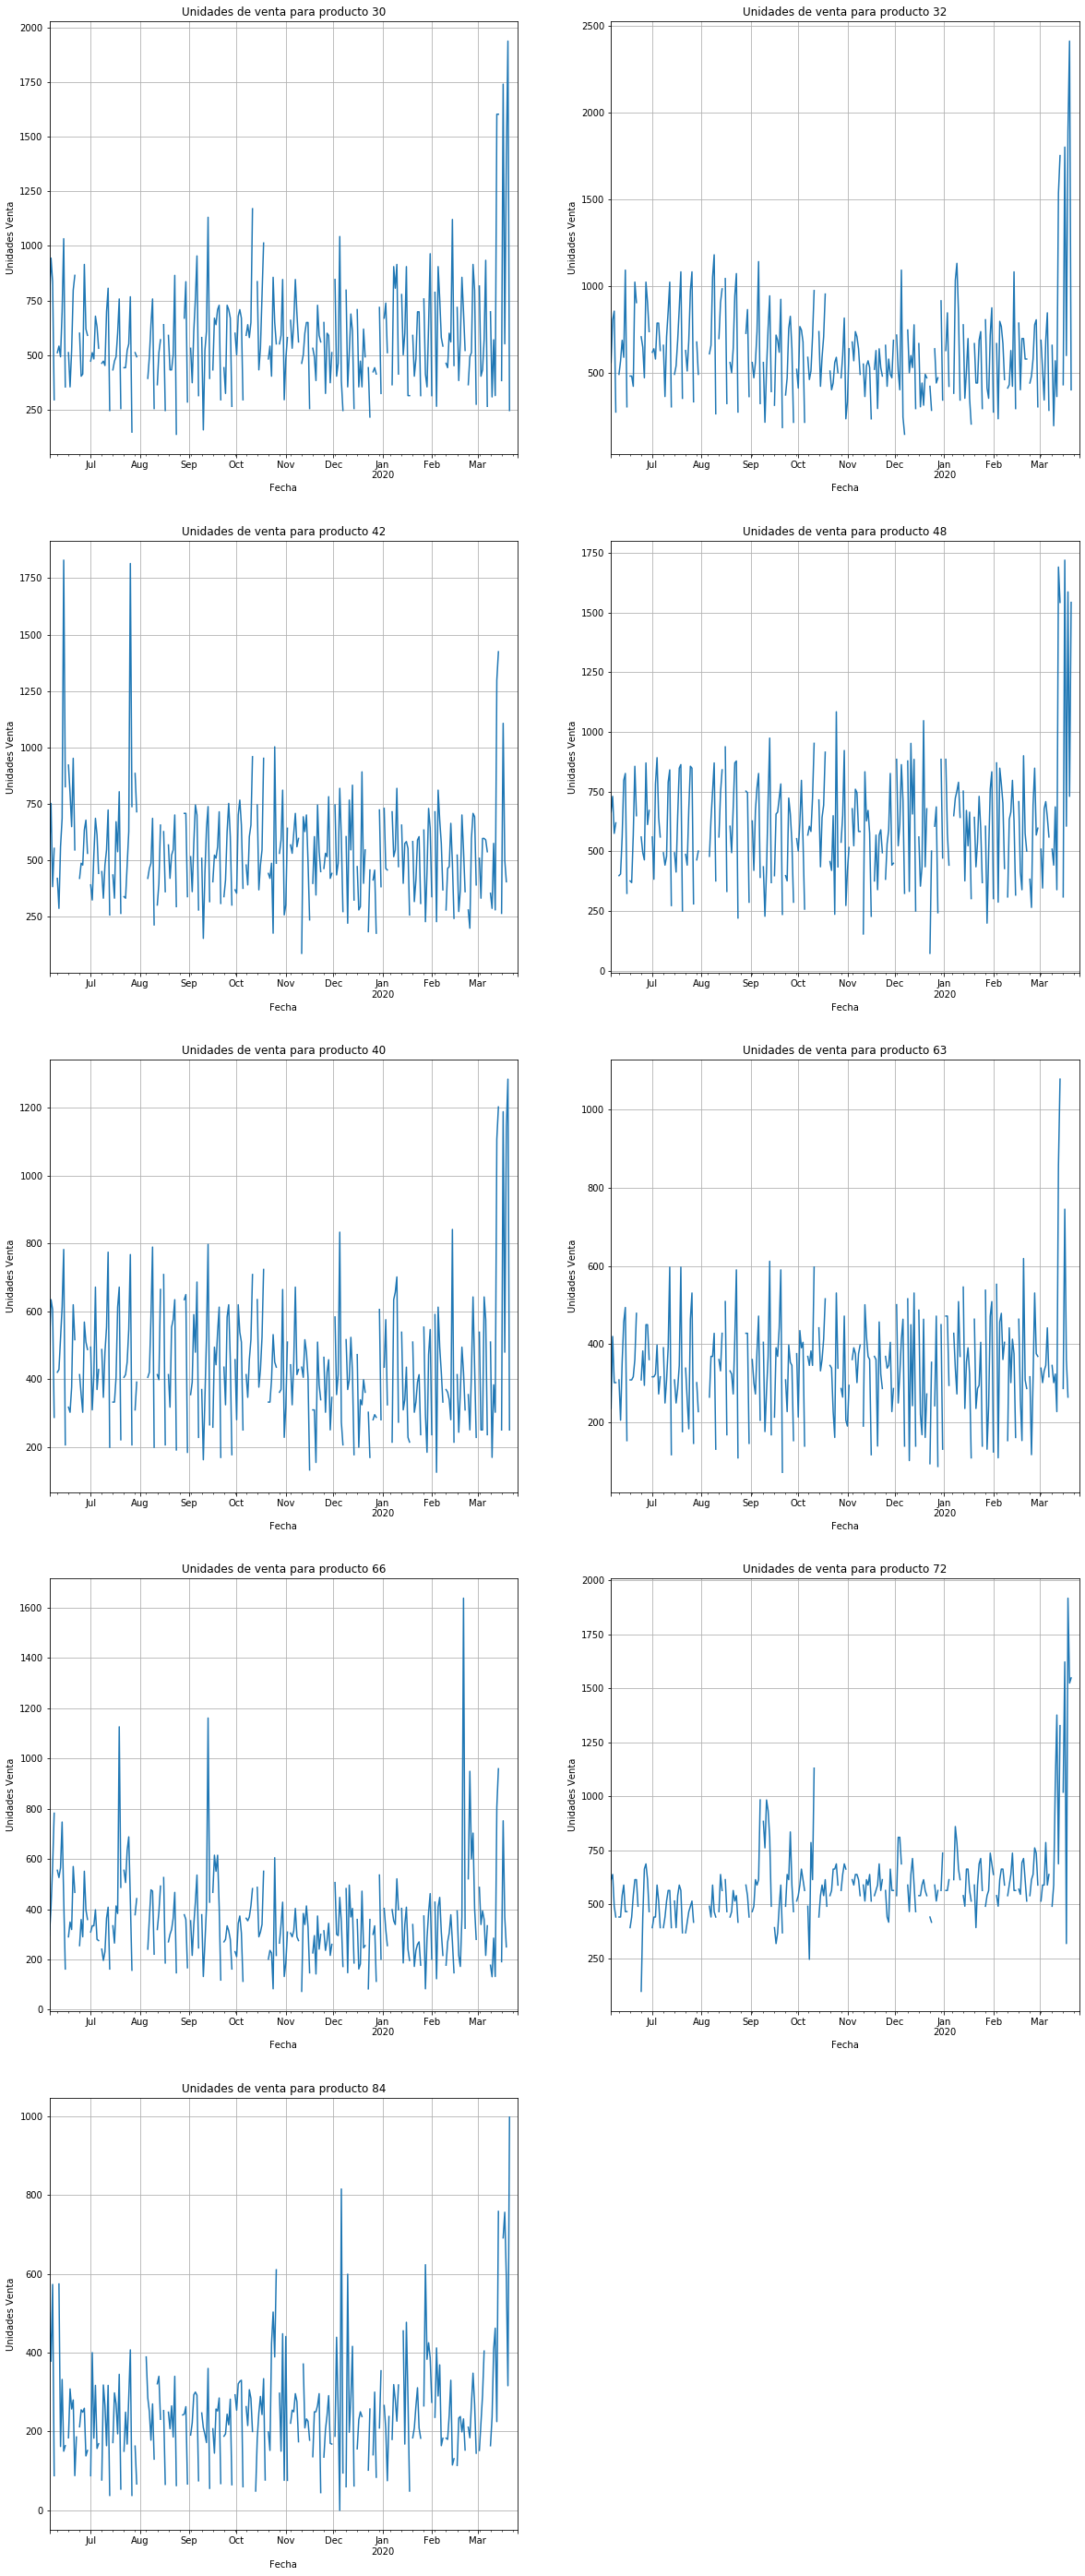

In [10]:
def plot_series2(df):
    df['udsventa'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Venta")

plt.figure(figsize=(20,50))

for i, prod in enumerate(["30","32","42","48","40","63","66","72","84"]):
    plt.subplot(5,2,i+1)
    prod_data = main_df.loc[main_df.producto == prod].set_index("fecha")
    plot_series2(prod_data)
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_ventas.png")
   

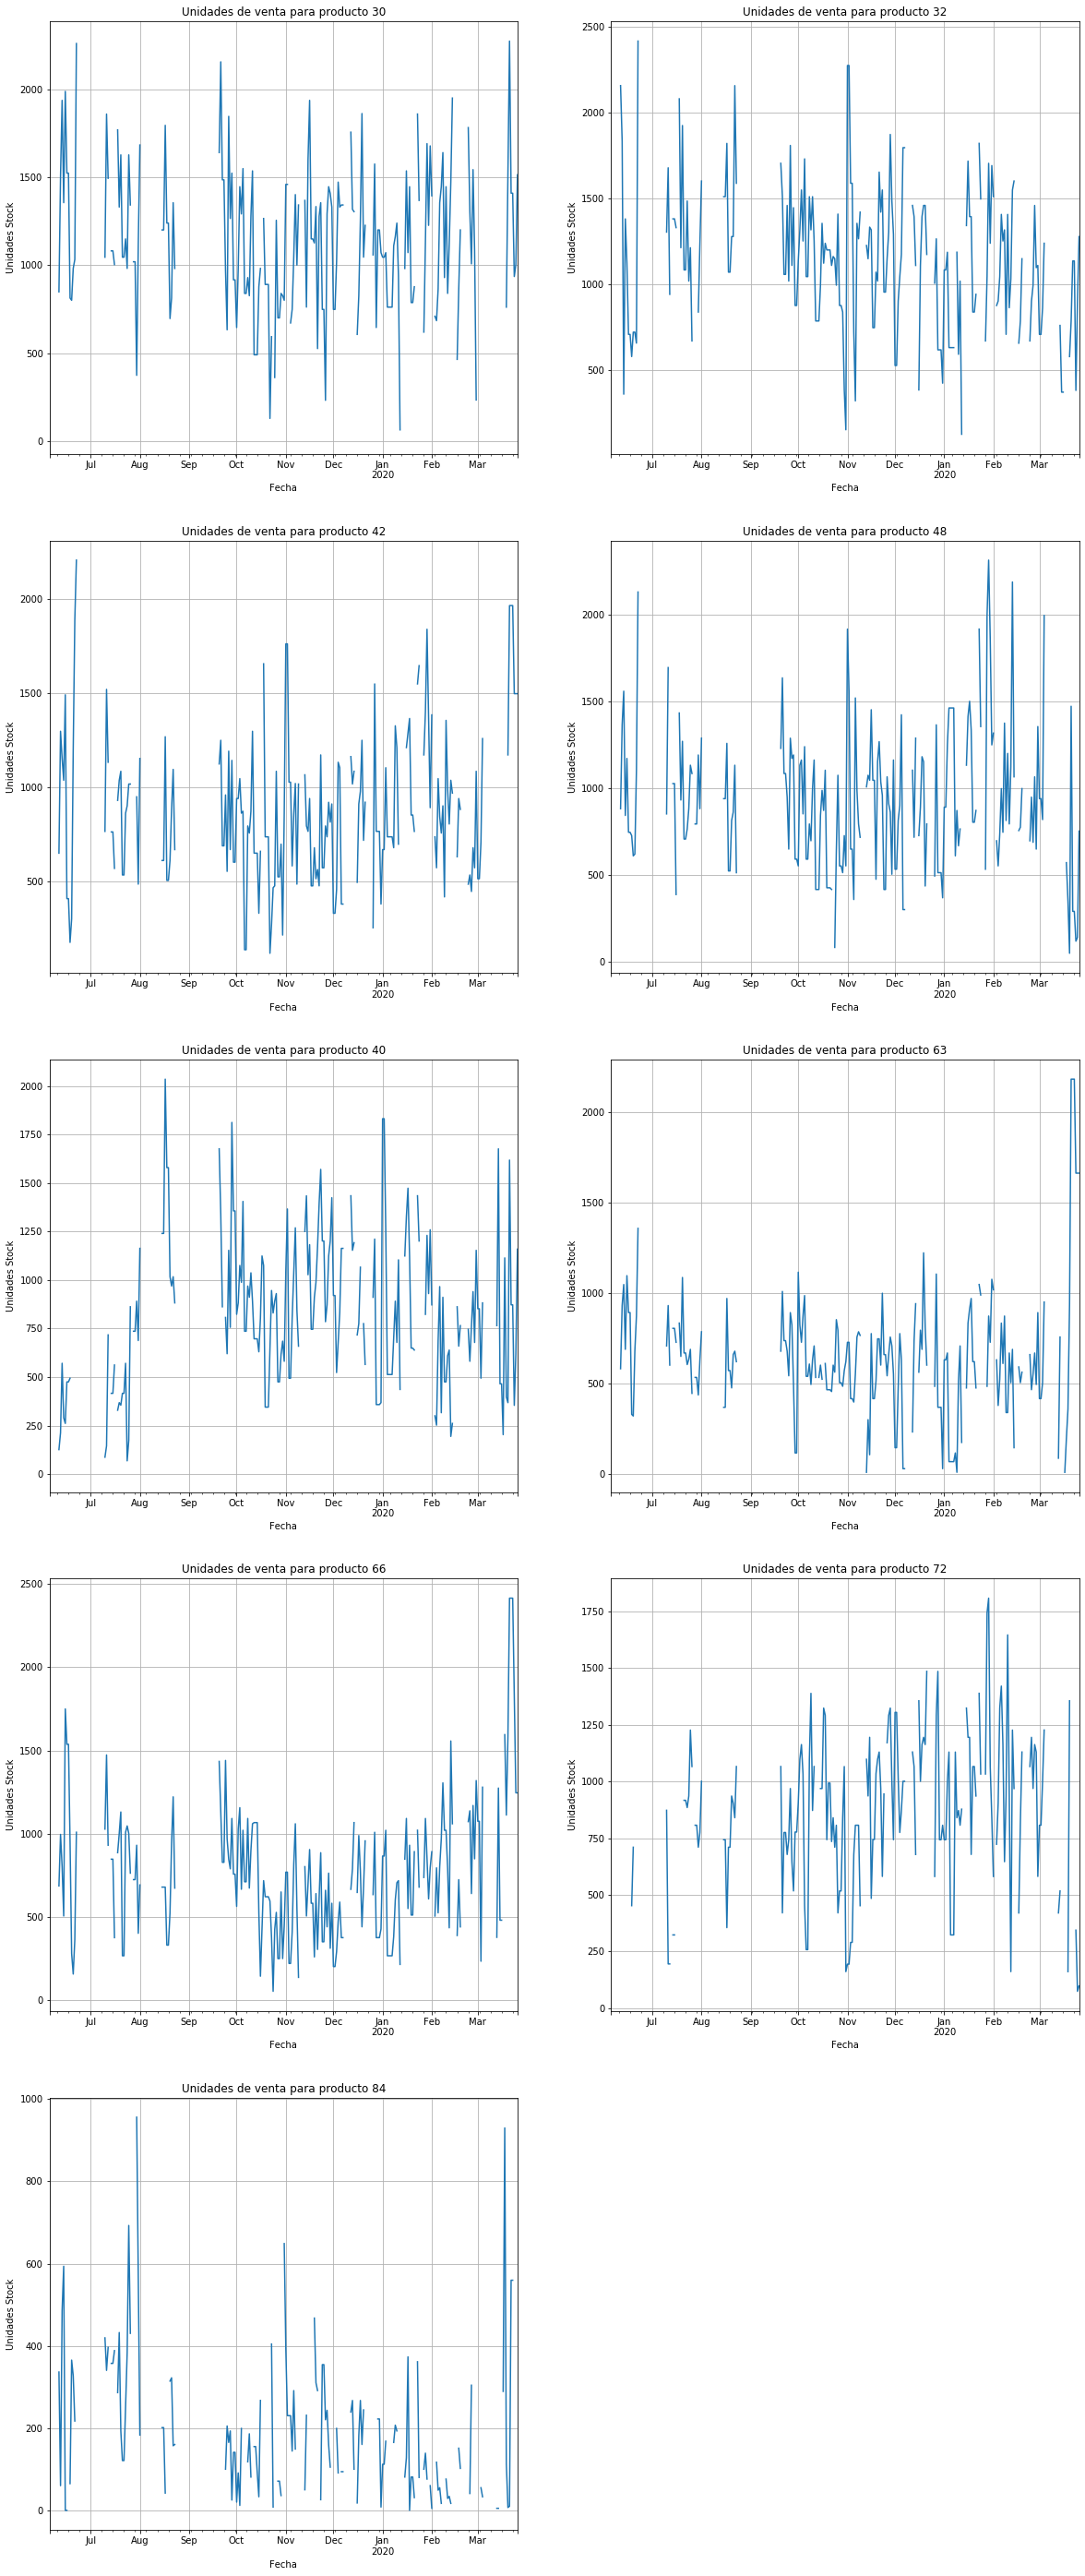

In [20]:

def plot_series2(df):
    df['udsstock'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Stock")

plt.figure(figsize=(20,50))

for i, prod in enumerate(["30","32","42","48","40","63","66","72","84"]):
    plt.subplot(5,2,i+1)
    prod_data = main_df.loc[main_df.producto == prod].set_index("fecha")
    plot_series2(prod_data)
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_stock.png")

# Entrenamiento modelo

In [16]:
from src.prepare_data import prepare_train_data, train_test_split
prep_df = prepare_train_data(main_df)

prep_df

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 288
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               8064 (21024 total rows).
Missings in holiday days:         1786 (3600 total rows).
Missings in working days:         6278 (17424 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 2994
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 1786
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday,quarter,month,...,udsprevisionempresa_shifted3,udsprevisionempresa_shifted4,udsprevisionempresa_shifted5,udsprevisionempresa_shifted6,udsprevisionempresa_shifted7,udsstock_diff-1,udsstock_diff1,udsstock_diff7,udsventa_diff1,udsstock_shifted-1
0,2019-06-05,1,18275.0,2833.0,102304.0,0.0,0.0,2,2,6,...,0.0,0.0,0.0,0.0,0.0,16008.0,0.0,0.0,0.0,2267.0
1,2019-06-05,10,2267.0,1874.0,36888.0,1.0,0.0,2,2,6,...,0.0,0.0,0.0,0.0,0.0,-239.0,-16008.0,0.0,-959.0,2506.0
2,2019-06-05,11,2506.0,2755.0,31078.0,0.0,0.0,2,2,6,...,0.0,0.0,0.0,0.0,0.0,1227.0,239.0,0.0,881.0,1279.0
3,2019-06-05,12,1279.0,1161.0,33661.0,0.0,0.0,2,2,6,...,102304.0,0.0,0.0,0.0,0.0,-1214.0,-1227.0,0.0,-1594.0,2493.0
4,2019-06-05,13,2493.0,1603.0,32119.0,1.0,0.0,2,2,6,...,36888.0,102304.0,0.0,0.0,0.0,1161.0,1214.0,0.0,442.0,1332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21019,2020-03-22,91,3.0,0.0,0.0,0.0,0.0,6,1,3,...,0.0,0.0,0.0,0.0,0.0,-565.0,-2568.0,-74.0,0.0,568.0
21020,2020-03-22,94,568.0,0.0,0.0,0.0,0.0,6,1,3,...,0.0,0.0,0.0,0.0,0.0,87.0,565.0,236.0,0.0,481.0
21021,2020-03-22,96,481.0,0.0,0.0,1.0,0.0,6,1,3,...,0.0,0.0,0.0,0.0,0.0,-65.0,-87.0,-79.0,0.0,546.0
21022,2020-03-22,97,546.0,0.0,0.0,0.0,0.0,6,1,3,...,0.0,0.0,0.0,0.0,0.0,-37.0,65.0,-289.0,0.0,583.0


===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get shifted variable 

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               87 (292 total rows).
Missings in holiday days:         20 (50 total rows).
Missings in working days:         67 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 26
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 20
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get shifted variable 

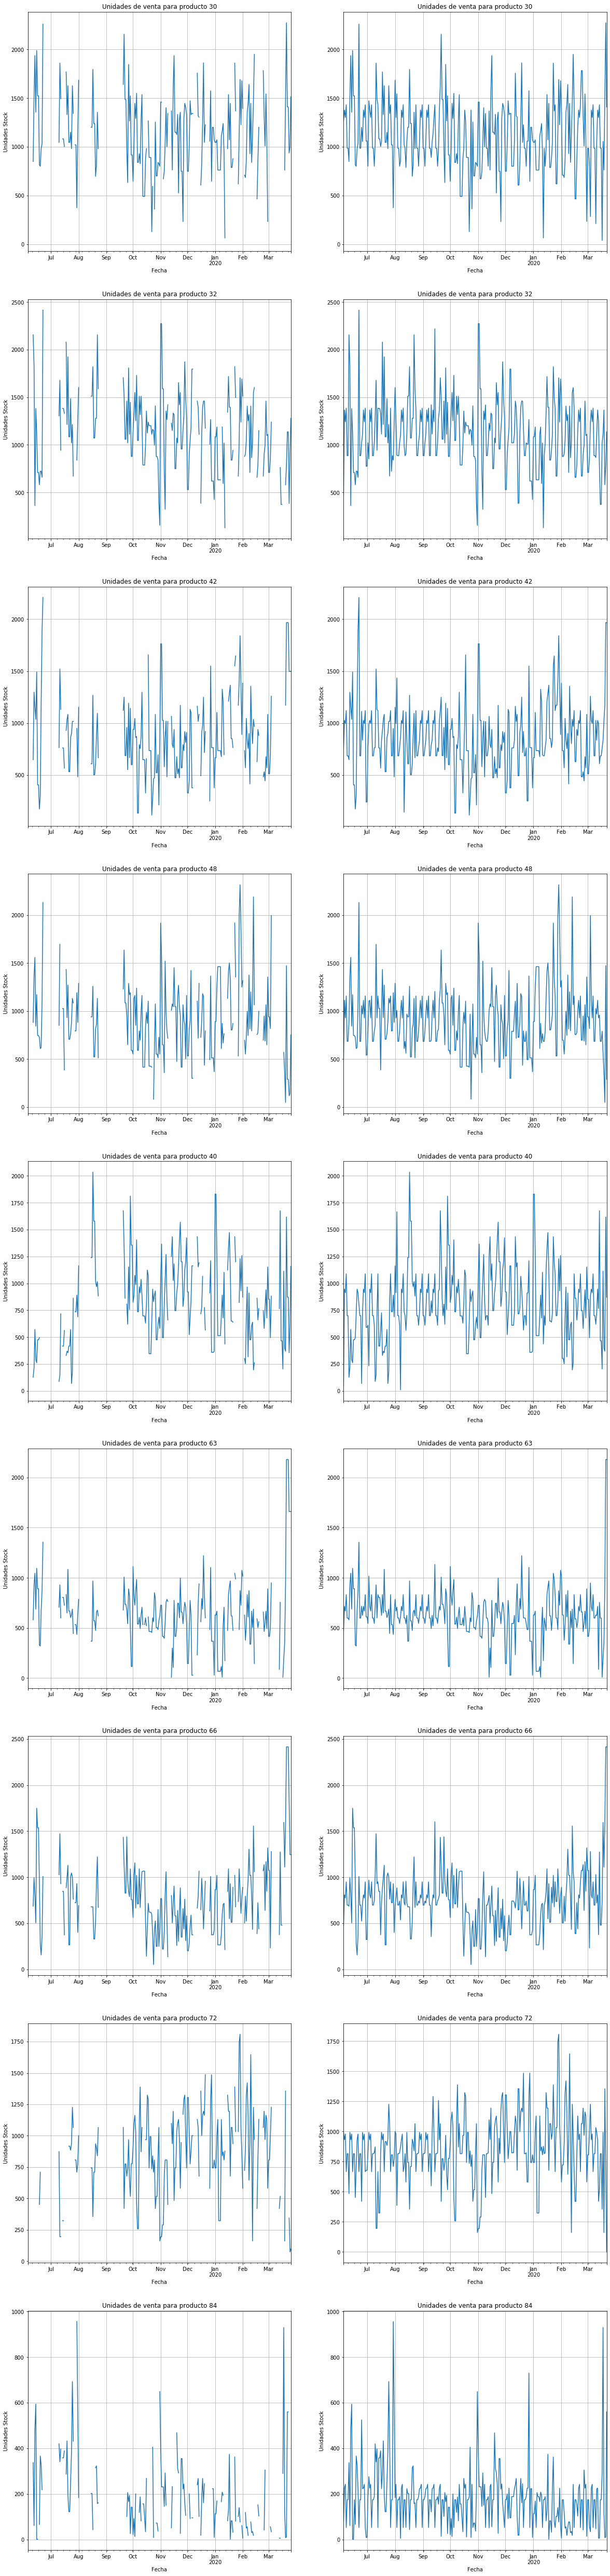

In [30]:
def plot_series2(df):
    df['udsstock'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Stock")

plt.figure(figsize=(20,90))

for i, prod in enumerate(["30","32","42","48","40","63","66","72","84"]):
    plt.subplot(9,2,i*2+1)
    prod_data = main_df.loc[main_df.producto == prod]
    plt.title("Unidades de venta para producto {}".format(prod))
    plot_series2(prod_data.set_index("fecha"))
    plt.grid(True)
    plt.subplot(9,2,i*2+2)
    prep_data = prepare_train_data(prod_data)
    plot_series2(prep_data.set_index("fecha"))
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_stock_filled.png")

In [34]:
prod_data = main_df.loc[main_df.producto == "30"]

In [35]:
prod_data = prepare_train_data(prod_data)
prod_data

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get shifted variable 

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday,quarter,month,...,udsprevisionempresa_shifted3,udsprevisionempresa_shifted4,udsprevisionempresa_shifted5,udsprevisionempresa_shifted6,udsprevisionempresa_shifted7,udsstock_diff-1,udsstock_diff1,udsstock_diff7,udsventa_diff1,udsstock_shifted-1
0,2019-06-05,30,1266.000000,738.0,11310.0,0.0,0.0,2,2,6,...,0.0,0.0,0.0,0.0,0.0,-112.633333,0.000000,0.000000,0.0,1378.633333
1,2019-06-06,30,1378.633333,944.0,17426.0,0.0,0.0,3,2,6,...,0.0,0.0,0.0,0.0,0.0,76.736782,112.633333,0.000000,206.0,1301.896552
2,2019-06-07,30,1301.896552,836.0,13665.0,0.0,0.0,4,2,6,...,0.0,0.0,0.0,0.0,0.0,-130.526525,-76.736782,0.000000,-108.0,1432.423077
3,2019-06-08,30,1432.423077,295.0,2876.0,0.0,0.0,5,2,6,...,11310.0,0.0,0.0,0.0,0.0,446.503077,130.526525,0.000000,-541.0,985.920000
4,2019-06-09,30,985.920000,0.0,0.0,0.0,0.0,6,2,6,...,17426.0,11310.0,0.0,0.0,0.0,0.000000,-446.503077,0.000000,-295.0,985.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2020-03-18,30,1055.258065,551.0,2265.0,0.0,0.0,2,1,3,...,0.0,0.0,7439.0,3985.0,2883.0,293.258065,1016.258065,0.000000,-1190.0,762.000000
288,2020-03-19,30,762.000000,1407.0,3526.0,0.0,0.0,3,1,3,...,946.0,0.0,0.0,7439.0,3985.0,-749.000000,-293.258065,-616.633333,856.0,1511.000000
289,2020-03-20,30,1511.000000,1938.0,3892.0,0.0,0.0,4,1,3,...,1375.0,946.0,0.0,0.0,7439.0,-764.000000,749.000000,209.103448,531.0,2275.000000
290,2020-03-21,30,2275.000000,246.0,0.0,0.0,0.0,5,1,3,...,2265.0,1375.0,946.0,0.0,0.0,865.000000,764.000000,842.576923,-1692.0,1410.000000


In [46]:
train_data = prod_data.loc[prod_data.stockMissingType == 0, ['udsstock', 'udsventa', 'quarter', 'month',
                                                'sin_weekday', 'cos_weekday', 'udsventa_diff1',
                                                'roll4wd_udsstock']].reset_index(drop=True)

In [52]:
import os
import pickle
import joblib
import time
from src.validate import validate, cross_validate

class Model(object):
    """
    Model Class: it can be initializate with an instance of any model class
                        or with a model path to an untrained or trained pickle.
                        The Class that represents the model has to have a FIT and PREDICT method.
        Fit method:     includes the preprocess logic to train a model
        Predict Method: includes the preprocess and postprocess logic
    """
    def __init__(self, model):
        self._model = model
        
    def fit(self, train_x, train_y):
        """
        Load raw data, preprocess it and fit the model to the train data
        Record preprocess + train elapsed time
        """
        # Guardamos train size y train features
        [self.train_size, self.features] = train_x.shape
        print('{:=^80}'.format('  TRAINING MODEL  '))
        print("Starting training...")
        t0 = time.time()
        #train_x = self._preprocessor.preprocess(train_x)
        self._model.fit(train_x, train_y)
        self.train_time = time.time() - t0
        print("Model trained in {} s.".format(self.train_time))
        print('{:=^80}'.format(''))

    def predict(self, model_input):
        """
        Clean data and infer data (predict)
        """
        model_input = clean_data(model_input)
        predicted_target = self._infer(model_input)
        predicted_target = self._postprocessor.postprocess(predicted_target)
        return predicted_target

    def _infer(self, model_input):
        """
        Infer data and measure infer time.
        """
        t0 = time.time()
        predicted_target = self._model.predict(model_input)
        self.inference_time = time.time() - t0
        return predicted_target

    def evaluate(self, test_x, test_y):
        """
        Takes two numpy arrays test_x, test_y:
        returns a dictionary with the metrics
        to evaluate a productive model (with comebacks)
        and also the training time + inference time
        """
        self.test_size = test_x.shape[0]
        print('{:=^80}'.format('  VALIDATE MODEL  '))
        print("Evaluating productive model...")
        pred_y = self._infer(test_x)
        # Validamos las predicciones de test
        metrics = validate(test_y, pred_y)
        # Incluimos metricas de training
        metrics['train_time'] = self.train_time
        metrics['mean_inference_time'] = self.inference_time/self.test_size
        metrics['train_size'] = self.train_size
        metrics['test_size'] = self.test_size
        print('{:=^80}'.format(''))
        return metrics
    
    def evaluate_predictive(self, test_x, test_y):
        """
        Takes two numpy arrays test_x, test_y:
        returns a dictionary with the metrics
        to evaluate a predictive model (without comebacks)
        and also the training time + inference time
        """
        print("=== Evaluating predictive model...")
        #test_x = self._preprocessor.preprocess(test_x) 
        pred = self._model.predict(test_x)
        metrics = validate(test_y, pred)
        metrics['train_time'] = self.train_time
        return metrics

    @classmethod
    def from_path(cls, model_dir):
        model_path = os.path.join(model_dir, 'model.joblib')
        model = joblib.load(model_path)
        return cls(model)

In [56]:
import numpy as np
import pandas as pd

from src.read_config import read_config_model
from src.prepare_data import split_data
from src.preprocess import Normalize, FeatureSelection
from src.validate import cross_validate

def run(data, target, base_model, model_name):
    """
    Run a training of a machine learning model 
    Args:
        data (pd.DataFrame):        DataFrame with the filtered data
        target (str):               Name of the prediction target.              
        base_model (sklearn model): Scikit-learn object that will be used as base model for training.
      
    Returns:
        model:                      Trained model
        metrics (dict):             Dictionary with all the metrics for the model
    """    
    # Set experiment name
    experiment_name = "StockForecasting"

    # Get model info
    _, tags, params = read_config_model("stock", model_name)

    print('{:=^80}'.format('  RUN  '))
    print("Starting RUN on project {}.".format(experiment_name))
    
    # Split data
    train_x, train_y, test_x, test_y = split_data(data, target, test_size=0.25)

    # Init model
    norm = Normalize()
    pipeline = Pipeline([("norm", norm), ("model", base_model)])
    model = Model(pipeline)
    
    # Train model
    model.fit(train_x, train_y)

    # Evaluate model
    metrics = model.evaluate(test_x, test_y)
    metrics['features'] = train_x.shape[1]
    print(metrics)


    print('{:=^80}'.format(''))
    return model, metrics



model, metrics = run(train_data, "udsstock", base_model, "PR_30")

====================================  RUN  =====================================
Starting RUN on project StockForecasting.
- Splitting the data with test proportion: 25.0% ...
Train size: (146, 8)
Test size: (49, 8)
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (146, 7)
**********************************************************************


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.3048248291015625 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (49, 7)
**********************************************************************
{'mean_error': -56.82346938775509, 'std_error': 523.5111860772222, 'r2': 0.4530860179570715, 'predict_out': array([ 4,  0,  2,  3,  3,  0,  3,  1,  4,  2,  1,  0,  3,  0,  2,  2,  0,
        3,  0,  1,  3,  3,  3,  0, 18,  2,  2,  1,  4,  0,  0,  0,  3,  2,
        3,  0,  0,  3,  0,  3,  3,  0, 18,  3,  2,  2,  0,  0,  0]), 'mae': 242.73040816326534, 'rmse': 313.1957531705716, 'mape': 54.54156148866226, 'smape': 38.09663384129656, 'mase': nan, 'mase_wd': nan, 'train_time': 0.3048248291015625, 'mean_inference_time': 0.0003368173326764788, 'train_size': 146, 'test_size': 49, 'features': 7}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [60]:
def split_data(data, target, test_size=0.10):
    """
    Split data into: train_x, train_y, test_x, test_y. 
    Args:
        data (pd.DataFrame):    dataframe loaded from the table "prodiq_mft_value_lab"
        target (str):           two values are posible:  "lab_density_avg", "lab_ib_avg"
        test_size (float):      size (between 0-1) of the test set
    Returns:
        train_x (pd.DataFrame): a dataframe that contains the train data with all posible predictor variables.
        train_y (np.array): an array that contains the train data with target variable.
        test_x (pd.DataFrame): a dataframe that contains the test data with predictor variables.
        test_y (np.array): an array that contains the test data with target variable.
    """
    print("- Splitting the data with test proportion: {}% ...".format(test_size*100))

    # Split the data into training and test sets
    train, test = train_test_split(data, test_size=test_size, shuffle=False)
    # Split the data into training and tests with test equal to last 5 registers 
    #train, test = train_test_split(data, test_size=test_size, shuffle = False)

    # Split the data into predictor and target variables
    train_x = train.drop([target], axis=1)
    test_x = test.drop([target], axis=1)
    train_y = train[[target]]
    test_y = test[[target]]
    print("Train size: {}".format(train.shape))
    print("Test size: {}".format(test.shape))
    return train_x, train_y, test_x, test_y


split_data(train_data, "udsstock", test_size=0.1)

- Splitting the data with test proportion: 10.0% ...
Train size: (175, 8)
Test size: (20, 8)


(     udsventa  quarter  month  sin_weekday  cos_weekday  udsventa_diff1  \
 0       738.0        2      6     0.974928    -0.222521             0.0   
 1       541.0        2      6     0.781831     0.623490            30.0   
 2       492.0        2      6     0.974928    -0.222521           -49.0   
 3       698.0        2      6     0.433884    -0.900969           206.0   
 4      1033.0        2      6    -0.433884    -0.900969           335.0   
 ..        ...      ...    ...          ...          ...             ...   
 170     757.0        1      2     0.433884    -0.900969          -148.0   
 171     580.0        1      2    -0.433884    -0.900969          -177.0   
 172     541.0        1      2    -0.974928    -0.222521           -39.0   
 173       0.0        1      2    -0.781831     0.623490          -541.0   
 174     462.0        1      2     0.000000     1.000000           462.0   
 
      roll4wd_udsstock  
 0            1266.000  
 1             849.000  
 2         

In [ ]:
def run(data, target, base_model, model_name):
    """
    Run a training of a machine learning model 
    Args:
        data (pd.DataFrame):        DataFrame with the filtered data
        target (str):               Name of the prediction target.              
        base_model (sklearn model): Scikit-learn object that will be used as base model for training.
      
    Returns:
        model:                      Trained model
        metrics (dict):             Dictionary with all the metrics for the model
    """    
    # Set experiment name
    experiment_name = "StockForecasting"

    # Get model info
    _, tags, params = read_config_model("stock", model_name)

    print('{:=^80}'.format('  RUN  '))
    print("Starting RUN on project {}.".format(experiment_name))
    
    # Split data
    train, test = train_test_split(data, test_size=0.1, shuffle=False)

    cv_metrics = run_cv(train, target, base_model, model_name)

    train_x = train.drop([target], axis=1)
    test_x = test.drop([target], axis=1)
    train_y = train[[target]]
    test_y = test[[target]]

    # Init model
    norm = Normalize()
    pipeline = Pipeline([("norm", norm), ("model", base_model)])
    model = Model(pipeline)
    
    # Train model
    model.fit(train_x, train_y)

    # Evaluate model
    metrics = model.evaluate(test_x, test_y)
    metrics['features'] = train_x.shape[1]
    print(metrics)

    model.predict(train_x)

    print('{:=^80}'.format(''))
    return model, metrics

In [62]:
data = prod_data.loc[prod_data.stockMissingType == 0, ['udsstock', 'udsventa', 'quarter', 'month',
                                                'sin_weekday', 'cos_weekday', 'udsventa_diff1',
                                                'roll4wd_udsstock']].reset_index(drop=True)

target = "udsstock"
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(n_estimators=200)
model_name = "PR_30"

In [63]:
train, test = train_test_split(data, test_size=0.1, shuffle=False)

train, test

(     udsstock  udsventa  quarter  month  sin_weekday  cos_weekday  \
 0      1266.0     738.0        2      6     0.974928    -0.222521   
 1       849.0     541.0        2      6     0.781831     0.623490   
 2      1508.0     492.0        2      6     0.974928    -0.222521   
 3      1938.0     698.0        2      6     0.433884    -0.900969   
 4      1356.0    1033.0        2      6    -0.433884    -0.900969   
 ..        ...       ...      ...    ...          ...          ...   
 170    1356.0     757.0        1      2     0.433884    -0.900969   
 171    1447.0     580.0        1      2    -0.433884    -0.900969   
 172    1641.0     541.0        1      2    -0.974928    -0.222521   
 173     930.0       0.0        1      2    -0.781831     0.623490   
 174    1447.0     462.0        1      2     0.000000     1.000000   
 
      udsventa_diff1  roll4wd_udsstock  
 0               0.0          1266.000  
 1              30.0           849.000  
 2             -49.0          1326.

In [64]:
cv_metrics = run_cv(train, target, base_model, model_name)

============================  CROSS VALIDATE MODEL  ============================
Intializing Cross Validate Method...
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (140, 7)
**********************************************************************
Model trained in 0.3250868320465088 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (35, 7)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor v

In [65]:
train_x = train.drop([target], axis=1)
test_x = test.drop([target], axis=1)
train_y = train[[target]]
test_y = test[[target]]

# Init model
norm = Normalize()
pipeline = Pipeline([("norm", norm), ("model", base_model)])
model = Model(pipeline)

# Train model
model.fit(train_x, train_y)

# Evaluate model
metrics = model.evaluate(test_x, test_y)
metrics['features'] = train_x.shape[1]
print(metrics)

===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (175, 7)
**********************************************************************


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.3295297622680664 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 7)
**********************************************************************
{'mean_error': 3.478749999999991, 'std_error': 636.549576503816, 'r2': 0.2281036837535927, 'predict_out': array([1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]), 'mae': 413.35974999999996, 'rmse': 526.6415000251594, 'mape': 211.6763583336428, 'smape': 56.595832550670934, 'mase': nan, 'mase_wd': nan, 'train_time': 0.3295297622680664, 'mean_inference_time': 0.0012079238891601562, 'train_size': 175, 'test_size': 20, 'features': 7}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (175, 7)
**********************************************************************


,y_pred,y_real,type
0,1237.210,1266.0,train
1,789.740,849.0,train
2,1435.830,1508.0,train
3,1872.865,1938.0,train
4,1375.280,1356.0,train
...,...,...,...
170,1401.730,1356.0,train
171,1442.850,1447.0,train
172,1544.005,1641.0,train
173,774.155,930.0,train


In [78]:
pred_test = model._infer(test_x)

predict_test = pd.DataFrame({"y_pred": pred_test, "y_real": np.array(test_y).reshape(-1)})

predict_test["type"] = "test"

predict = pd.concat([predict_train, predict_test])

****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 7)
**********************************************************************


,y_pred,y_real,type
0,1237.210,1266.0,train
1,789.740,849.0,train
2,1435.830,1508.0,train
3,1872.865,1938.0,train
4,1375.280,1356.0,train
...,...,...,...
15,757.750,39.0,test
16,1241.900,762.0,test
17,1357.305,1511.0,test
18,989.260,2275.0,test


In [68]:
pred_test = model._infer(test_x)

****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 7)
**********************************************************************


array([ 903.855,  953.345, 1484.935, 1239.785,  797.815,  892.14 ,
       1066.475,  956.555,  853.565, 1148.67 , 1283.855, 1404.525,
        936.37 , 1005.98 ,  784.87 ,  757.75 , 1241.9  , 1357.305,
        989.26 , 1235.47 ])

In [79]:
data

,udsstock,udsventa,quarter,month,sin_weekday,cos_weekday,udsventa_diff1,roll4wd_udsstock
0,1266.0,738.0,2,6,0.974928,-0.222521,0.0,1266.0
1,849.0,541.0,2,6,0.781831,0.623490,30.0,849.0
2,1508.0,492.0,2,6,0.974928,-0.222521,-49.0,1326.5
3,1938.0,698.0,2,6,0.433884,-0.900969,206.0,1938.0
4,1356.0,1033.0,2,6,-0.433884,-0.900969,335.0,1356.0
...,...,...,...,...,...,...,...,...
190,39.0,1741.0,1,3,0.781831,0.623490,1358.0,395.4
191,762.0,1407.0,1,3,0.433884,-0.900969,856.0,1153.0
192,1511.0,1938.0,1,3,-0.433884,-0.900969,531.0,1295.0
193,2275.0,246.0,1,3,-0.974928,-0.222521,-1692.0,1254.5
